<a href="https://colab.research.google.com/github/MahiraMohammed/ABC-Basket-Ball-Company-Python-Project/blob/main/MLAssignment3_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regression Assignment
Objective:
 The objective of this assignment is to evaluate your understanding of regression techniques in supervised learning by applying them to a real-world dataset.

Dataset:
Use the California Housing dataset available in the sklearn library. This dataset contains information about various features of houses in California and their respective median prices.



Key Components to be Fulfilled:
Loading and Preprocessing


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import fetch_california_housing


In [ ]:
df=fetch_california_housing(as_frame=True)

In [ ]:
df=df.frame

In [ ]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
df.shape

(20640, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
scaler.fit(df)

StandardScaler()

In [ ]:
scaled_df=scaler.transform(df)

In [ ]:
scaled_df

array([[ 2.34476576,  0.98214266,  0.62855945, ...,  1.05254828,
        -1.32783522,  2.12963148],
       [ 2.33223796, -0.60701891,  0.32704136, ...,  1.04318455,
        -1.32284391,  1.31415614],
       [ 1.7826994 ,  1.85618152,  1.15562047, ...,  1.03850269,
        -1.33282653,  1.25869341],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ...,  1.77823747,
        -0.8237132 , -0.99274649],
       [-1.05458292, -0.84539315, -0.04021111, ...,  1.77823747,
        -0.87362627, -1.05860847],
       [-0.78012947, -1.00430931, -0.07044252, ...,  1.75014627,
        -0.83369581, -1.01787803]])

In [ ]:
scaled_df=pd.DataFrame(scaled_df)

In [ ]:
scaled_df

,0,1,2,3,4,5,6,7,8
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,2.129631
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,1.314156
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,1.258693
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,1.165100
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,1.172900
...,...,...,...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110,1.801647,-0.758826,-1.115804
20636,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021,1.806329,-0.818722,-1.124470
20637,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735,1.778237,-0.823713,-0.992746
20638,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225,1.778237,-0.873626,-1.058608


<Axes: >

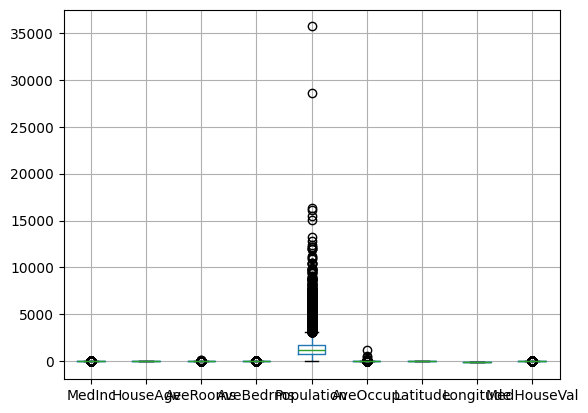

In [ ]:
df.boxplot()

In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Data cleaning improves data quality and reliability, leading to more accurate and meaningful insights.

Data Transformation
Scaling/Normalization: Features with different scales can negatively impact model performance. Techniques like standardization (scaling to zero mean and unit variance) or min-max scaling (scaling to a specific range) bring features to a similar scale.

Regression Algorithm Implementation

 Implementing the following regression algorithms:




Linear Regression

Decision Tree Regressor

Random Forest Regressor

Gradient Boosting Regressor

Support Vector Regressor (SVR)






Linear Regression

Linear Regression models the relationship between a dependent variable and one or more independent variables using a linear equation. It aims to find the best-fitting line that minimizes the difference between predicted and actual values.

Linear Regression can be a good starting point for the California Housing dataset as it can captures linear relationships between features like housing median age, total rooms, and median house value. It's also relatively easy to interpret. However, if the relationships are non-linear, it might not be the best choice.

In [ ]:
from sklearn.model_selection import train_test_split
X=df.drop('MedHouseVal',axis=1)
y=df['MedHouseVal']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(X_test)
y_pred

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251])

In [ ]:
mse_linear=mean_squared_error(y_test,y_pred)

In [ ]:
mse_linear

0.5558915986952444

In [ ]:
mae_linear=mean_absolute_error(y_test,y_pred)
mae_linear

0.5332001304956553

In [ ]:
r2_linear=r2_score(y_test,y_pred)
r2_linear

0.5757877060324508

Decision Tree Regressor

A Decision Tree Regressor builds a tree-like model by recursively splitting the data based on features to make predictions. Each leaf node represents a predicted value.

Decision Trees can handle both linear and non-linear relationships and can capture interactions between features. They are also relatively easy to interpret. However, they can be prone to overfitting, especially with complex datasets.



In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse_decisiontree = mean_squared_error(y_test, y_pred)
mse_decisiontree

0.495235205629094

In [ ]:
mae_decisiontree=mean_absolute_error(y_test,y_pred)
mae_decisiontree

0.45467918846899225

In [ ]:
r2_decisiontree=r2_score(y_test,y_pred)
r2_decisiontree

0.622075845135081

Random Forest Regressor

A Random Forest Regressor combines multiple Decision Trees to make predictions. Each tree is trained on a random subset of the data and features, and the final prediction is an average of the predictions from all trees.

Random Forests are generally more robust and accurate than individual Decision Trees as they reduce overfitting. They can handle complex relationships and are suitable for the California Housing dataset.



In [ ]:

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust n_estimators as needed
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_RandomForest = mean_squared_error(y_test, y_pred)
mse_RandomForest

0.2553684927247781

In [ ]:
mae_RandomForest=mean_absolute_error(y_test,y_pred)
mae_RandomForest

0.32754256845930246

In [ ]:
r2_RandomForest=r2_score(y_test,y_pred)
r2_RandomForest

0.8051230593157366

Gradient Boosting Regressor

How it works: Gradient Boosting Regressor builds an ensemble of weak learners (typically Decision Trees) sequentially, where each tree corrects the errors of the previous ones. It uses a gradient descent optimization to minimize the loss function.

Suitability for the dataset: Gradient Boosting is known for its high accuracy and ability to handle complex relationships. It's a good choice for the California Housing dataset, but it can be computationally expensive and might require careful tuning of hyperparameters.

Implementation:

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
mse_GradientBoosting=mean_squared_error(y_test,y_pred)
mse_GradientBoosting

0.2940787695751335

In [ ]:
mae_GradientBoosting=mean_absolute_error(y_test,y_pred)
mae_GradientBoosting

0.37171553690875236

In [ ]:
r2_GradientBoosting=r2_score(y_test,y_pred)
r2_GradientBoosting

0.7755824521517652

Support Vector Regressor (SVR)

SVR uses Support Vector Machines (SVMs) for regression tasks. It aims to find a hyperplane that best fits the data while allowing for a certain margin of error.

SVR can handle non-linear relationships using kernel functions and is effective in high-dimensional spaces. However, it can be sensitive to parameter tuning and might not be as interpretable as other algorithms.

In [ ]:
from sklearn.svm import SVR
model=SVR()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
mse_SVR=mean_squared_error(y_test,y_pred)
mse_SVR

1.3320115421348744

In [ ]:
mae_SVR=mean_absolute_error(y_test,y_pred)
mae_SVR

0.8599506583445761

In [ ]:
r2_SVR=r2_score(y_test,y_pred)
r2_SVR

-0.01648536010717372

In [179]:
result_df={'Model':['Linear Regression','Decision Tree Regressor','Random Forest Regressor','Gradient Boosting Regressor','Support Vector Regressor'],
'mse':[mse_linear,mse_decisiontree,mse_RandomForest,mse_GradientBoosting,mse_SVR],
'mae':[mae_linear,mae_decisiontree,mae_RandomForest,mae_GradientBoosting,mae_SVR],
'R2_score':[r2linear,r2_decisiontree,r2_RandomForest,r2_GradientBoosting,r2_SVR]}

In [ ]:
result_df

{'Model': ['Linear Regression',
  'Decision Tree Regressor',
  'Random Forest Regressor',
  'Gradient Boosting Regressor',
  'Support Vector Regressor'],
 'mse': [0.5558915986952444,
  0.495235205629094,
  0.2553684927247781,
  0.2940787695751335,
  1.3320115421348744],
 'mae': [0.5332001304956553,
  0.45467918846899225,
  0.32754256845930246,
  0.37171553690875236,
  0.8599506583445761],
 'R2_score': [0.5757877060324508,
  0.622075845135081,
  0.8051230593157366,
  0.7755824521517652,
  -0.01648536010717372]}

In [180]:
pd.DataFrame(result_df)

,Model,mse,mae,R2_score
0,Linear Regression,0.555892,0.533200,0.575788
1,Decision Tree Regressor,0.495235,0.454679,0.622076
2,Random Forest Regressor,0.255368,0.327543,0.805123
3,Gradient Boosting Regressor,0.294079,0.371716,0.775582
4,Support Vector Regressor,1.332012,0.859951,-0.016485


The best performing Algorithm should have lowest mse and mae values but r2_score should be highest.

While examining the result_df we find the Random Forest Regressor performs well on this dataset due to its ability to handle comples relationships and reduce overfitting.

On the otherhand, the Support Vector Regressor has highest mse and mae with lowest r2 score. This model is the least performer here.